In [1]:
# Imprting Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from datetime import date
plt.style.use('fivethirtyeight') #setting matplotlib style

In [2]:
import yfinance as yf
import pandas as pd

def get_close_data(ticker, period="1y"):
    """
    Fetches the closing prices for a given stock ticker and returns it as a pandas DataFrame
    with the 'Close' column renamed to the ticker symbol.
    
    Parameters:
    ticker (str): The stock ticker symbol.
    period (str): The period over which to download the data (default is '1y').
    
    Returns:
    pd.DataFrame: DataFrame with the renamed 'Close' column.
    """
    data = yf.download(ticker, period=period)  # Download data for the given period
    close_data = data['Close']  # Extract the 'Close' column
    close_df = pd.DataFrame(close_data).rename(columns={"Close": ticker})  # Rename 'Close' to ticker symbol
    return close_df

In [3]:
# Example usage:
aapl = get_close_data("AAPL")
msft = get_close_data("MSFT")
dell = get_close_data("DELL")
et = get_close_data("ET")

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [4]:
# Concatenate the ticker DataFrames
df_portfolio = pd.concat([msft, dell, et, aapl],axis=1)

# Display sample data
df_portfolio

,MSFT,DELL,ET,AAPL
Date,,,,
2023-10-02,321.799988,67.699997,13.780000,173.750000
2023-10-03,313.390015,67.239998,13.550000,172.399994
2023-10-04,318.959991,67.199997,13.340000,173.660004
2023-10-05,319.359985,66.190002,13.360000,174.910004
2023-10-06,327.260010,66.410004,13.460000,177.490005
...,...,...,...,...
2024-09-25,432.109985,120.169998,16.200001,226.369995
2024-09-26,431.309998,126.489998,15.920000,227.520004
2024-09-27,428.019989,120.220001,16.070000,227.789993


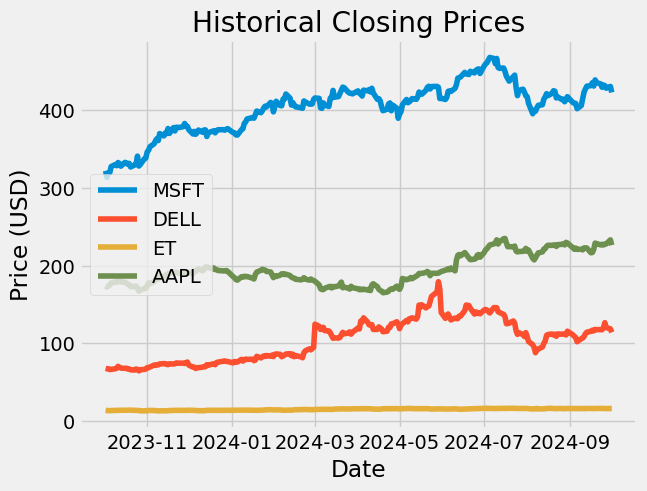

In [15]:
# Plot historical prices for multiple stocks
plt.plot(df_portfolio)

plt.title("Historical Closing Prices")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.legend(df_portfolio.columns, loc='center left')
plt.grid(True)
plt.show()

          MSFT      DELL        ET      AAPL
MSFT  1.000000  0.834543  0.816242  0.522003
DELL  0.834543  1.000000  0.848856  0.320025
ET    0.816242  0.848856  1.000000  0.506464
AAPL  0.522003  0.320025  0.506464  1.000000
Correlation between Stocks in your portfolio


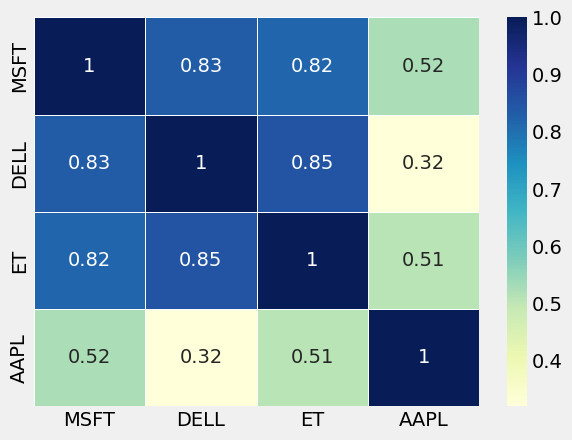

In [6]:
# Correlation Matrix

correlation_matrix = df_portfolio.corr(method='pearson')
print(correlation_matrix)

fig1 = plt.figure()
sb.heatmap(correlation_matrix,xticklabels=correlation_matrix.columns, yticklabels=correlation_matrix.columns,
cmap='YlGnBu', annot=True, linewidth=0.5)
print('Correlation between Stocks in your portfolio')
plt.show(fig1)

                MSFT      DELL        ET      AAPL
Date                                              
2023-10-03 -0.026134 -0.006795 -0.016691 -0.007770
2023-10-04  0.017773 -0.000595 -0.015498  0.007309
2023-10-05  0.001254 -0.015030  0.001499  0.007198
2023-10-06  0.024737  0.003324  0.007485  0.014750
2023-10-09  0.007823  0.011595  0.017088  0.008451
...              ...       ...       ...       ...
2024-09-25  0.006850  0.024380 -0.000617 -0.004398
2024-09-26 -0.001851  0.052592 -0.017284  0.005080
2024-09-27 -0.007628 -0.049569  0.009422  0.001187
2024-09-30  0.005327 -0.013974 -0.001245  0.022872
2024-10-01 -0.017987 -0.037877  0.000312 -0.029421

[251 rows x 4 columns]
Daily simple returns


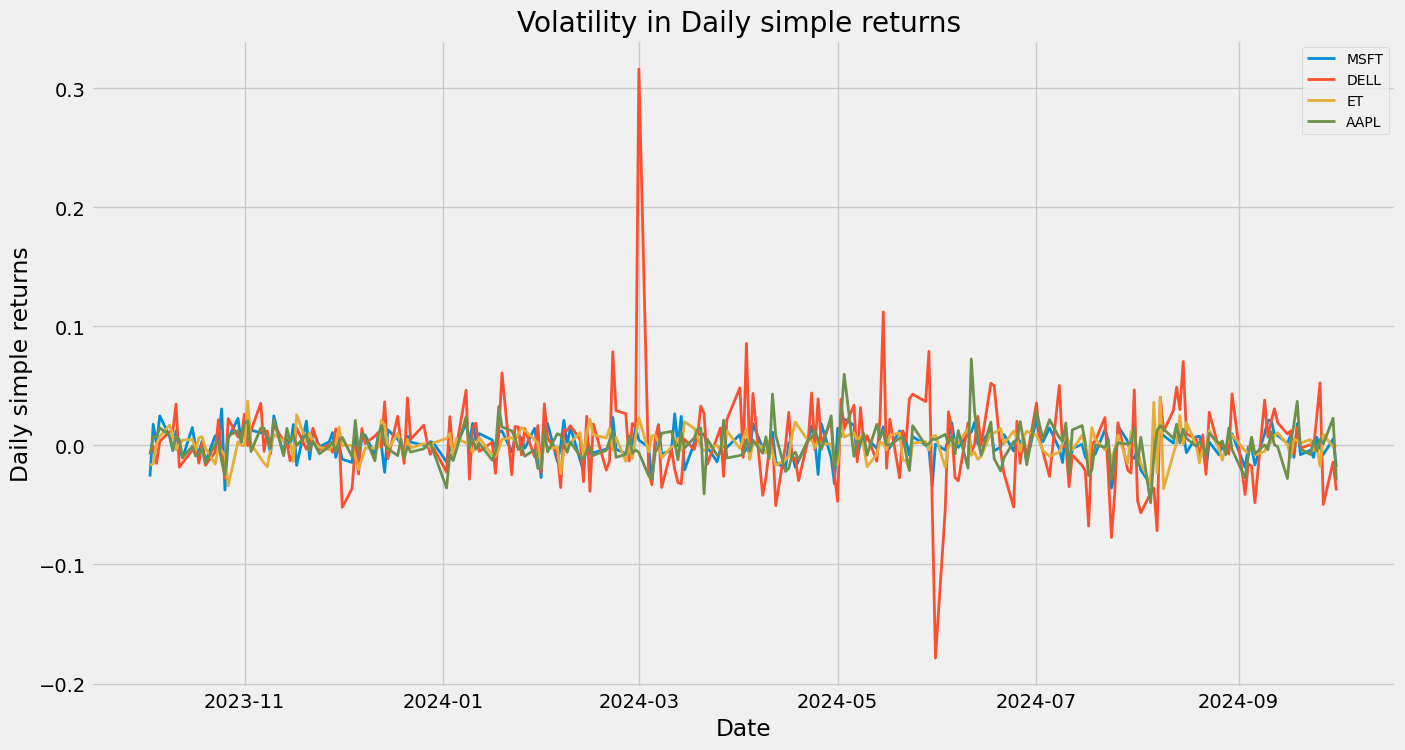

In [7]:
# Risk & Return

daily_simple_return = df_portfolio.pct_change(1)
daily_simple_return.dropna(inplace=True)
print(daily_simple_return)

print('Daily simple returns')
fig, ax = plt.subplots(figsize=(15,8))

for i in daily_simple_return.columns.values :
    ax.plot(daily_simple_return[i], lw =2 ,label = i)

ax.legend( loc = 'upper right' , fontsize =10)
ax.set_title('Volatility in Daily simple returns ')
ax.set_xlabel('Date')
ax.set_ylabel('Daily simple returns')
plt.show(fig)

In [8]:
#Average Daily returns
print('Average Daily returns(%) of stocks in your portfolio')
Avg_daily = daily_simple_return.mean()
print(Avg_daily*100)

Average Daily returns(%) of stocks in your portfolio
MSFT    0.116322
DELL    0.270116
ET      0.066743
AAPL    0.114984
dtype: float64


Annualized Standard Deviation (Volatality(%), 252 trading days) of individual stocks in your portfolio on the basis of daily simple returns.
MSFT    19.757066
DELL    57.246230
ET      17.206374
AAPL    22.469555
dtype: float64
MSFT    0.588760
DELL    0.471849
ET      0.387896
AAPL    0.511731
dtype: float64


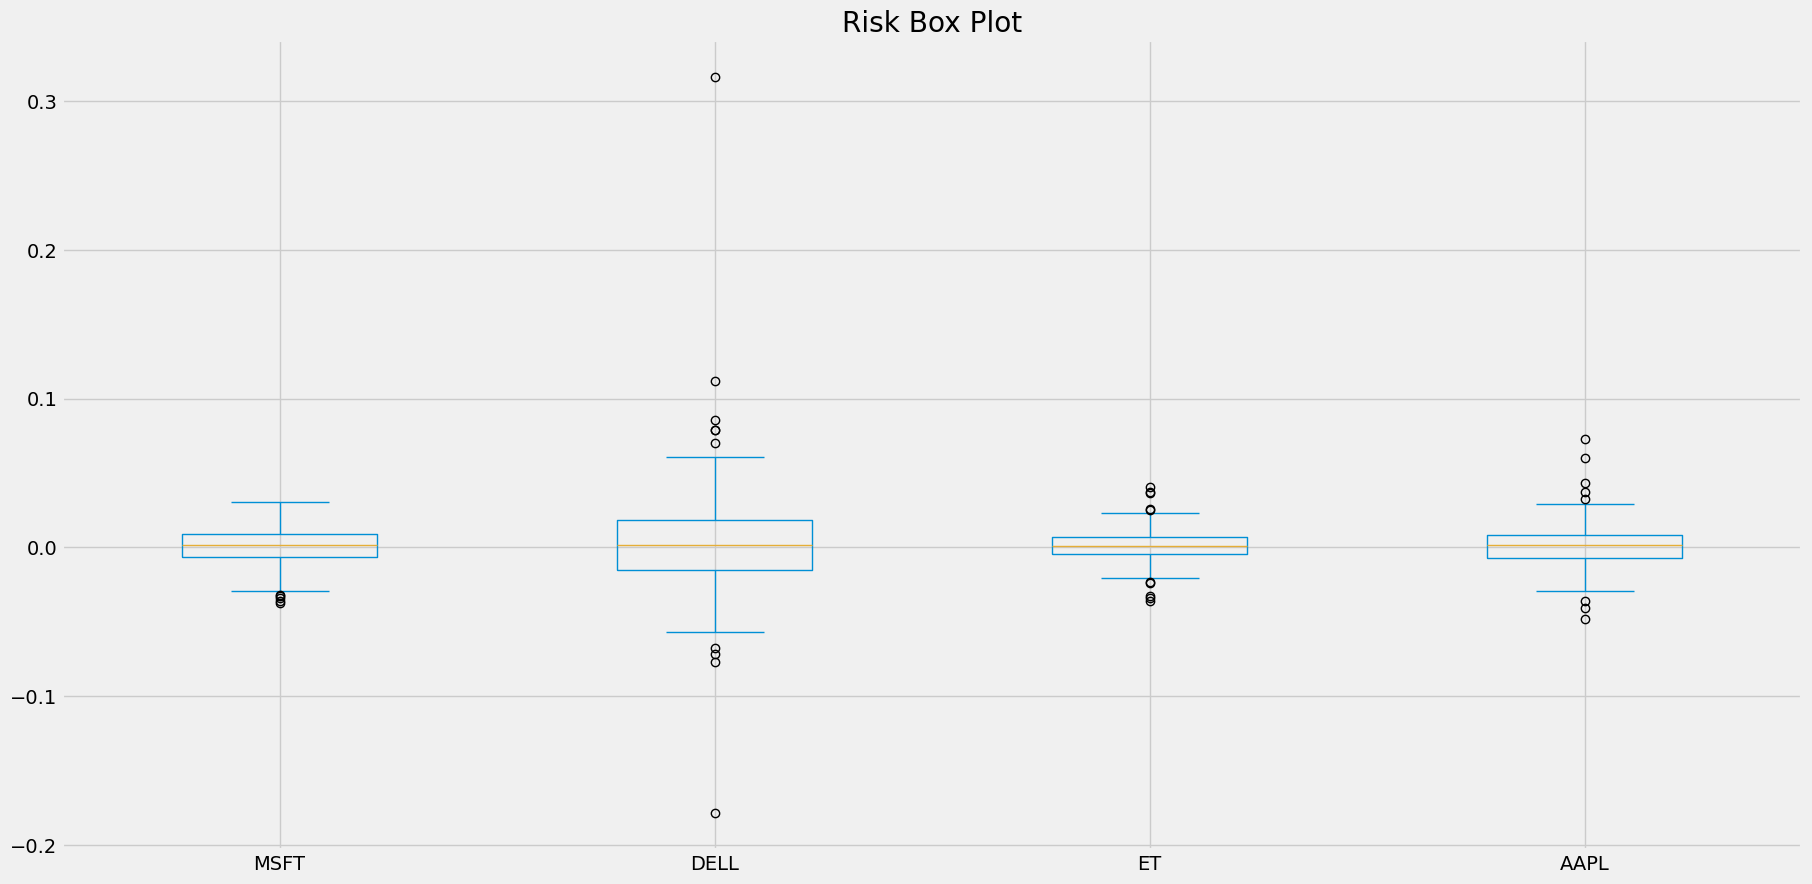

In [9]:
# Risk Box-Plot
daily_simple_return.plot(kind = "box",figsize = (20,10), title = "Risk Box Plot")

print('Annualized Standard Deviation (Volatality(%), 252 trading days) of individual stocks in your portfolio on the basis of daily simple returns.')
print(daily_simple_return.std() * np.sqrt(252) * 100)

# Return Per Unit Of Risk:
print(Avg_daily / (daily_simple_return.std() * np.sqrt(252)) *100)

                MSFT      DELL        ET      AAPL
Date                                              
2023-10-03  0.973866  0.993205  0.983309  0.992230
2023-10-04  0.991175  0.992614  0.968070  0.999482
2023-10-05  0.992418  0.977696  0.969521  1.006676
2023-10-06  1.016967  0.980945  0.976778  1.021525
2023-10-09  1.024922  0.992319  0.993469  1.030158
...              ...       ...       ...       ...
2024-09-25  1.342791  1.775037  1.175617  1.302849
2024-09-26  1.340305  1.868390  1.155298  1.309468
2024-09-27  1.330081  1.775776  1.166183  1.311022
2024-09-30  1.337166  1.750960  1.164731  1.341007
2024-10-01  1.313114  1.684638  1.165094  1.301554

[251 rows x 4 columns]
Cummulative Returns


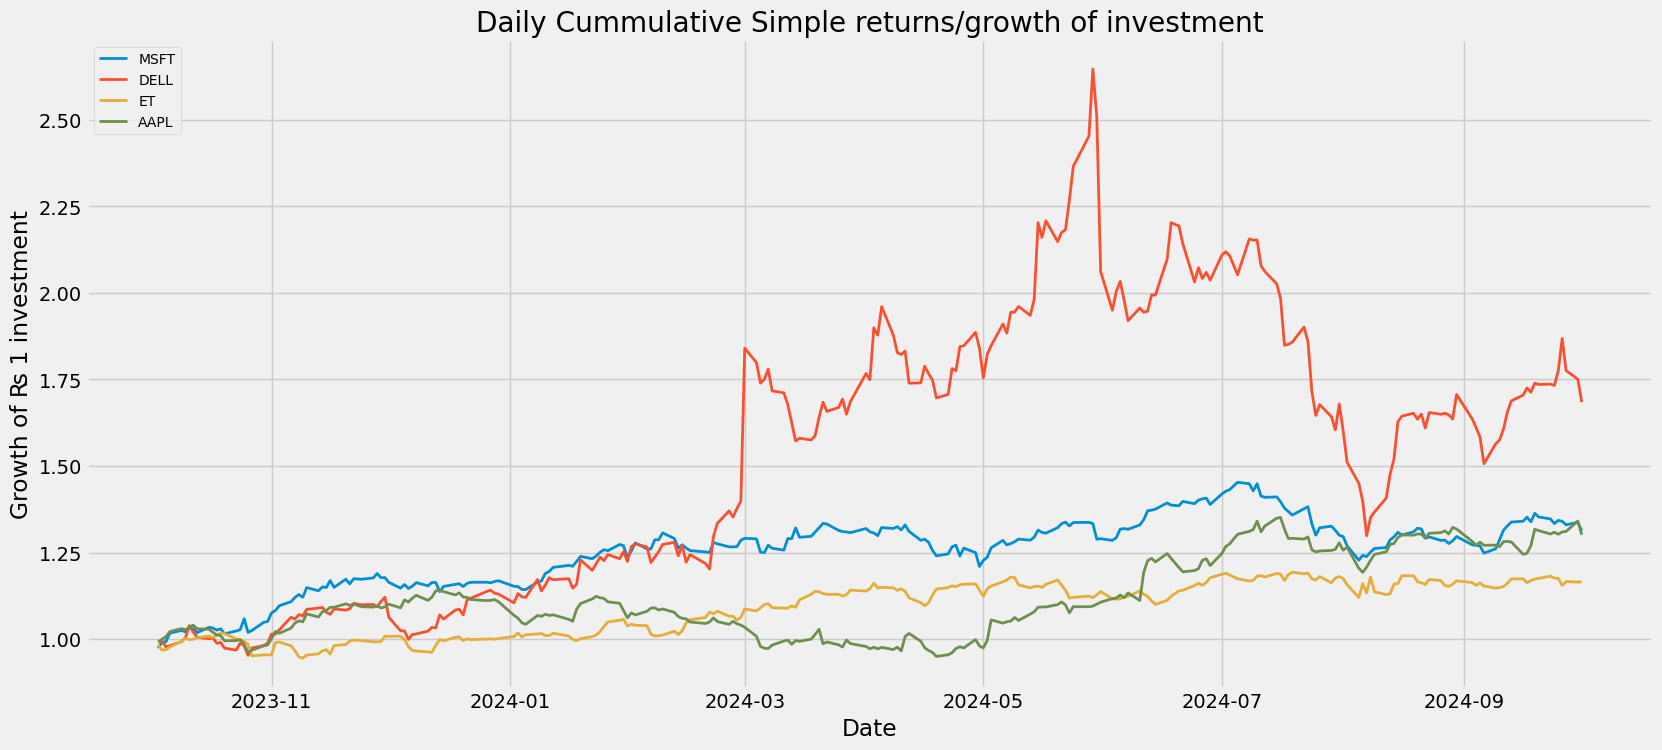

In [10]:
# Cumulative Returns:

daily_cummulative_simple_return =(daily_simple_return+1).cumprod()
print(daily_cummulative_simple_return)

#visualize the daily cummulative simple return
print('Cummulative Returns')
fig, ax = plt.subplots(figsize=(18,8))

for i in daily_cummulative_simple_return.columns.values :
    ax.plot(daily_cummulative_simple_return[i], lw =2 ,label = i)

ax.legend( loc = 'upper left' , fontsize =10)
ax.set_title('Daily Cummulative Simple returns/growth of investment')
ax.set_xlabel('Date')
ax.set_ylabel('Growth of ₨ 1 investment')
plt.show(fig)
